# Pymaceuticals Inc.
---

### Analysis:

- The mean and median tumor volume is very low compared to other Drugs (except Ramicane) and that indicates that the drug might be useful in reduction of tumor.
- Comparing Capomulin, Ramicane, Infubinol, and Ceftamin drug treatments, we see significantly lower means and distribution for Capomulin and Ramicane. This further indicates that these two drugs are working well compared to others. 
- Picking any random mouse treated with Capomulin, the tumor volume always seems to go down. This shows that Capomulin is definitely working to some extent.
- Finally, looking at the average tumor volume vs mouse weight for all mouse treated with Capomulin, it seems the tumor volume is very strongly positively correlated to the weight of the mouse.

### Conclusions:

- Capomulin has positive effect in reducing the tumors in the tested mice, and is potentially a good treatment. However, Ramicane has slightly better results across the board and therefore, Capomulin doesn't necessarily prove to be a better treatment than this specific alternate.
- Since weight and tumor volume are very strongly correlated for mice treated by Capomulin, Capomulin is potentially more effective for mice that weigh less.


In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = study_results.merge(mouse_metadata, how='left', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [193]:
# Checking the number of mice.
total_mouses = len(mouse_study_df['Mouse ID'].unique())
total_mouses

249

In [194]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ID = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [195]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = mouse_study_df.loc[mouse_study_df['Mouse ID'].isin(duplicate_mice_ID)]
duplicate_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [196]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df_new = mouse_study_df.loc[~mouse_study_df['Mouse ID'].isin(duplicate_mice_ID)]
mouse_study_df_new.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [197]:
# Checking the number of mice in the clean DataFrame.
total_mouses_new = len(mouse_study_df_new['Mouse ID'].unique())
total_mouses_new

248

## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = mouse_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_volume_median = mouse_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_var = mouse_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std = mouse_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sem = mouse_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

tumor_volume_data = pd.concat([tumor_volume_mean, tumor_volume_median, tumor_volume_var, \
                               tumor_volume_std, tumor_volume_sem], axis = 1)
tumor_volume_data.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', \
                             'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
tumor_volume_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_df_new.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

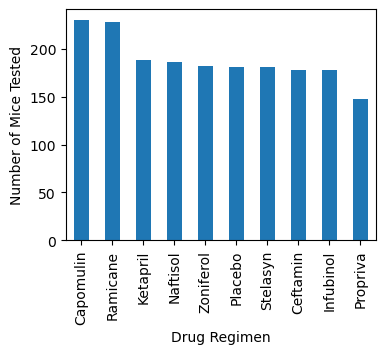

In [200]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = mouse_study_df_new.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
ax = mice_tested.plot.bar(figsize = (4,3))
ax.set_ylabel('Number of Mice Tested')
plt.show()

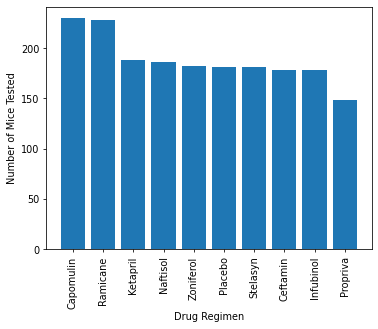

In [201]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_tested = mouse_study_df_new.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
drugs = mice_tested.index
plt.figure(figsize=(6, 4.5), dpi=70)
plt.bar(drugs, mice_tested)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

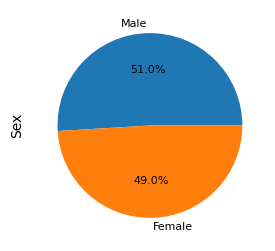

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
y = mouse_study_df_new.groupby(['Sex'])['Sex'].count().sort_values(ascending = False)
fig = y.plot.pie(autopct='%1.1f%%', figsize = (3,3), fontsize = 8)

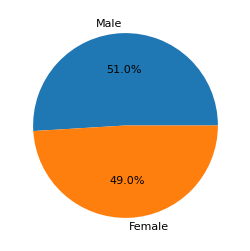

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (3,3))
plt.pie(y, labels = y.index, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.show()

In [204]:
df_max_time.dtypes

Mouse ID     object
Timepoint     int64
dtype: object

## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
select_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
select_regimen_df = mouse_study_df_new.loc[mouse_study_df_new['Drug Regimen'].isin(select_regimen)]
df_max = select_regimen_df.groupby(['Mouse ID']).max()
df_max_time = df_max[['Timepoint']].reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
select_final_df = mouse_study_df_new.merge(df_max_time, how = 'inner', on = ['Mouse ID','Timepoint'])
select_final_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25


In [206]:
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
count = 0
for i in select_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = select_final_df.loc[select_final_df['Drug Regimen']==i]['Tumor Volume (mm3)']
    #tumor_volume = list(tumor_volume_series)
    
    # add subset 
    final_tumor_volume.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr1_5 = iqr * 1.5
    lower_bound = lowerq - iqr1_5
    upper_bound = upperq + iqr1_5
    
    outliers = []
    for index, value in tumor_volume.iteritems():
        if value > upper_bound or value < lower_bound:
            outliers.append(tumor_volume[j])
    
    print(f"{i}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


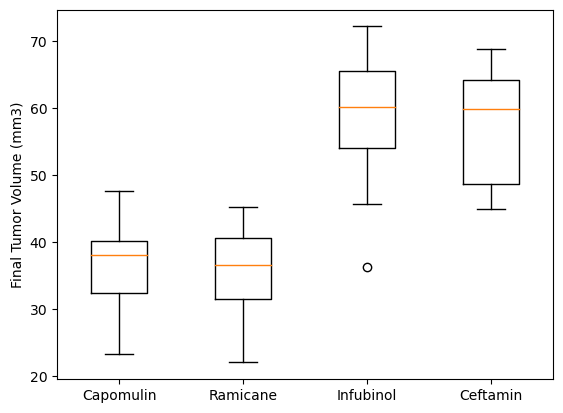

In [207]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_volume, labels = select_regimen)
plt.show()

## Line and Scatter Plots

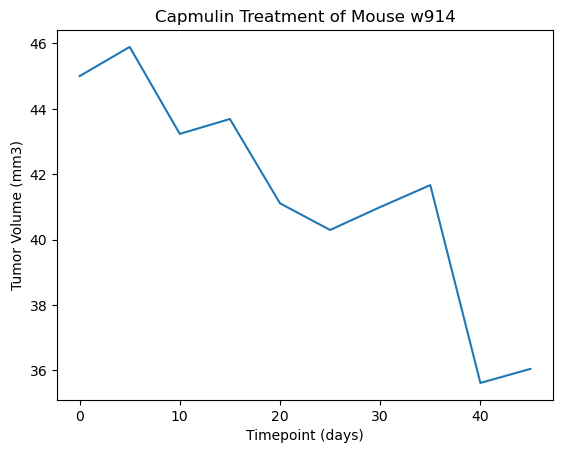

In [211]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_study_df_new.loc[mouse_study_df_new['Drug Regimen'] == 'Capomulin']
mouse = list(capomulin_df.sample()['Mouse ID'])
mouse_capomulin_df = capomulin_df.loc[capomulin_df['Mouse ID'].isin(mouse)]
mouse_capomulin_df.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', legend = False)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capmulin Treatment of Mouse {mouse[0]}")
plt.show()

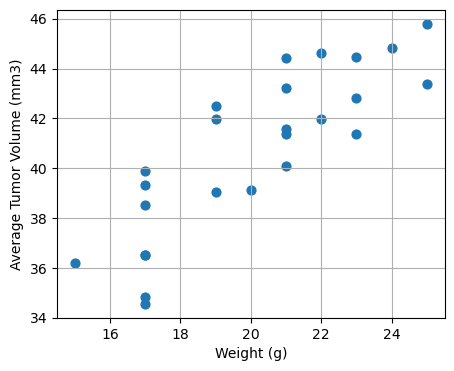

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_df = capomulin_df.groupby('Mouse ID').mean()
capomulin_avg_df.plot.scatter(y = 'Tumor Volume (mm3)', x = 'Weight (g)', figsize = (5,4), s = 40)
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


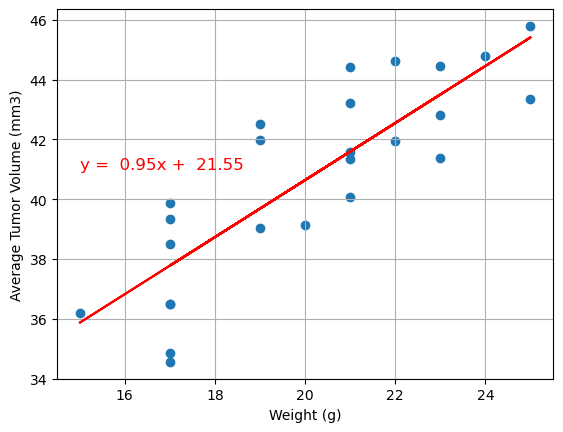

In [210]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_avg_df['Weight (g)']
y = capomulin_avg_df['Tumor Volume (mm3)']
slope, inter, r, p, std_err = st.linregress(x, y)
line_best = slope * x + inter
line_eq = f"y = {slope: .2f}x + {inter: .2f}"
print(f"The correlation between mouse weight and the average tumor volume is {r:.2f}")
plt.scatter(x, y)
plt.plot(x, line_best, color = 'r')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.annotate(line_eq, (15, 41), fontsize=12, color="red")
plt.grid()
plt.show()